In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elvinrustam/books-dataset")

print("Path to dataset files:", path)

100%|██████████| 52.9M/52.9M [00:07<00:00, 7.38MB/s]

Extracting files...


Path to dataset files: C:\Users\Safiya\.cache\kagglehub\datasets\elvinrustam\books-dataset\versions\3


In [2]:
import pandas as pd


In [3]:
books = pd.read_csv(f"{path}/BooksDataset.csv")


In [5]:
books


,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32
...,...,...,...,...,...,...,...
103077,Build 3 Super Serving Carts,By Chuck Hampton,NaN,NaN,ENDesigns Inc.,"Wednesday, January 1, 1992",Price Starting at $9.97
103078,My Land of Israel,"By Nover, Elizabeth Z.",NaN,"Juvenile Nonfiction , People & Places , Middl...",Behrman House,"Friday, May 1, 1987",Price Starting at $4.99
103079,Tongues: To Speak or Not to Speak,By Donald W. Burdick,NaN,NaN,Moody Press,"Wednesday, January 1, 1969",Price Starting at $5.29
103080,If I'm in charge here why is everybody laughing?,"By Campbell, David P.",NaN,NaN,Argus Communications,"Tuesday, January 1, 1980",Price Starting at $4.99


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


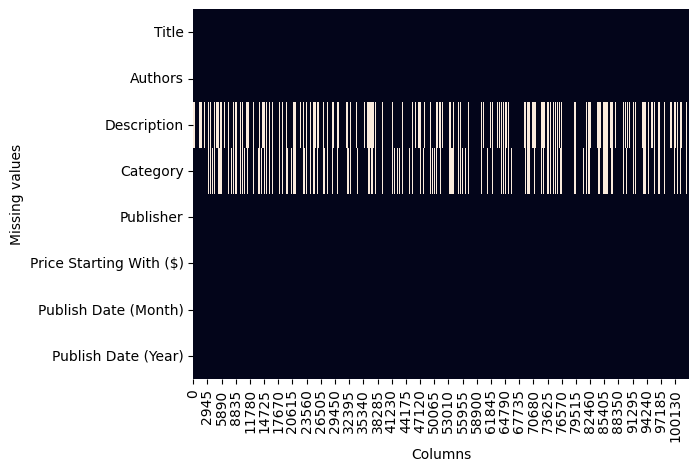

In [9]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [14]:
import numpy as np

books["missing_description"] = np.where(books["Description"].isna(), 1, 0)
books["missing_category"] = np.where(books["Category"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["Publish Date (Year)"]


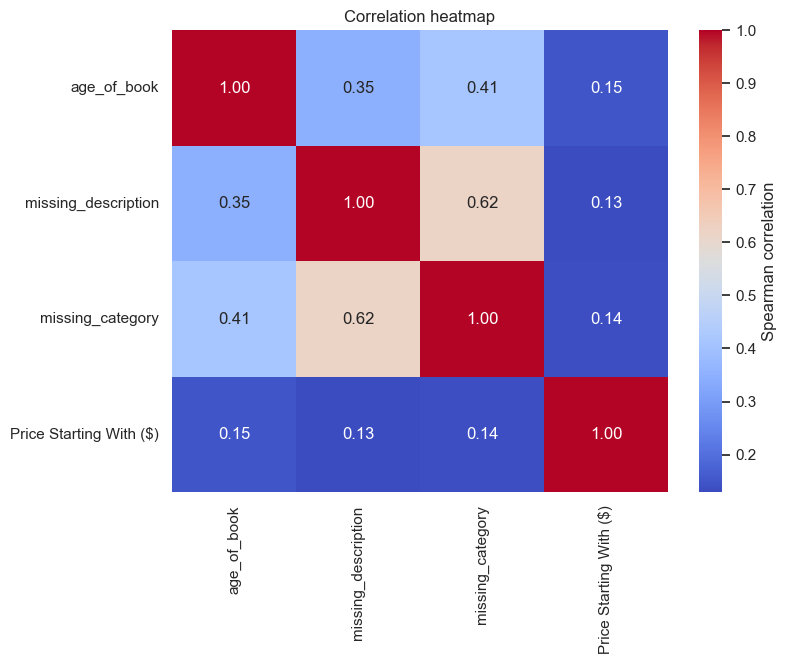

In [15]:
columns_of_interest = ["age_of_book", "missing_description", "missing_category","Price Starting With ($)"]

correlation_matrix = books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()


In [21]:
book_missing = books[-(books["Description"].isna()) &
      -(books["Category"].isna())
]

In [22]:
book_missing

,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year),missing_description,age_of_book,missing_category
7,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,19.96,September,2001,0,24,0
8,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,4.99,June,1987,0,38,0
10,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,4.99,January,1978,0,47,0
11,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,4.99,October,2001,0,24,0
13,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,5.29,May,1998,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...
103050,Like A Sister: A Novel,"By Daugharty, Janice",Sister cannot say exactly when or where she wa...,"Fiction , Literary",Harper,5.37,November,1999,0,26,0
103052,Creating Web Pages Simplified (3-D Visual Series),"By Maran, Ruth, Whitehead, Paul, and Marangrap...","An ""owner's manual"" for first-time Web page cr...","Computers , Internet , General",Hungry Minds Inc,5.95,January,1997,0,28,0
103053,EVA: The Real Key to Creating Wealth,"By Ehrbar, Al","Called ""today's hottest financial idea and get...","Business & Economics , Corporate Finance , Ge...",Wiley,29.96,October,1998,0,27,0
103056,The Essentials of Spanish (REA's Language Seri...,"By Mouat, Ricardo Gutierrez",REA’s Essentials provide quick and easy access...,"Foreign Language Study , Spanish",Research & Education Association,5.29,January,1998,0,27,0


In [23]:
book_missing["Category"].value_counts().reset_index().sort_values("count", ascending=False)

,Category,count
0,"Fiction , General",2274
1,"Fiction , Literary",1647
2,"Fiction , Mystery & Detective , General",1555
3,"Fiction , Thrillers , General",1105
4,"Fiction , Thrillers , Suspense",1041
...,...,...
2562,"Transportation , Automotive , Antique & Classic",1
2563,"Social Science , Sociology , Social Theory",1
2564,"Crafts & Hobbies , Models",1
2565,"Young Adult Nonfiction , Mathematics , Algebra",1


In [25]:
book_missing

,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year),missing_description,age_of_book,missing_category
7,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,19.96,September,2001,0,24,0
8,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,4.99,June,1987,0,38,0
10,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,4.99,January,1978,0,47,0
11,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,4.99,October,2001,0,24,0
13,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,5.29,May,1998,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...
103050,Like A Sister: A Novel,"By Daugharty, Janice",Sister cannot say exactly when or where she wa...,"Fiction , Literary",Harper,5.37,November,1999,0,26,0
103052,Creating Web Pages Simplified (3-D Visual Series),"By Maran, Ruth, Whitehead, Paul, and Marangrap...","An ""owner's manual"" for first-time Web page cr...","Computers , Internet , General",Hungry Minds Inc,5.95,January,1997,0,28,0
103053,EVA: The Real Key to Creating Wealth,"By Ehrbar, Al","Called ""today's hottest financial idea and get...","Business & Economics , Corporate Finance , Ge...",Wiley,29.96,October,1998,0,27,0
103056,The Essentials of Spanish (REA's Language Seri...,"By Mouat, Ricardo Gutierrez",REA’s Essentials provide quick and easy access...,"Foreign Language Study , Spanish",Research & Education Association,5.29,January,1998,0,27,0


In [28]:
book_missing["words_in_description"] = book_missing["Description"].str.split().str.len()

book_missing

C:\Users\Safiya\AppData\Local\Temp\ipykernel_10088\4254971429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["Description"].str.split().str.len()


,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year),missing_description,age_of_book,missing_category,words_in_description
7,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,19.96,September,2001,0,24,0,26
8,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,4.99,June,1987,0,38,0,30
10,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,4.99,January,1978,0,47,0,70
11,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,4.99,October,2001,0,24,0,429
13,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,5.29,May,1998,0,27,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...
103050,Like A Sister: A Novel,"By Daugharty, Janice",Sister cannot say exactly when or where she wa...,"Fiction , Literary",Harper,5.37,November,1999,0,26,0,318
103052,Creating Web Pages Simplified (3-D Visual Series),"By Maran, Ruth, Whitehead, Paul, and Marangrap...","An ""owner's manual"" for first-time Web page cr...","Computers , Internet , General",Hungry Minds Inc,5.95,January,1997,0,28,0,33
103053,EVA: The Real Key to Creating Wealth,"By Ehrbar, Al","Called ""today's hottest financial idea and get...","Business & Economics , Corporate Finance , Ge...",Wiley,29.96,October,1998,0,27,0,277
103056,The Essentials of Spanish (REA's Language Seri...,"By Mouat, Ricardo Gutierrez",REA’s Essentials provide quick and easy access...,"Foreign Language Study , Spanish",Research & Education Association,5.29,January,1998,0,27,0,89


In [29]:
book_missing.loc[book_missing["words_in_description"].between(1,4), "Description"]


11196                                 sychological aspects.
12058              Teaches children environmental awareness
13438                        Discusses the South's strategy
17805                                                #NAME?
26756                                                #NAME?
29173                              Includes healthy recipes
32492                              Inspirational quotations
33007                                                     2
39389                                   Oh! Christmas Trees
43054                 Thoroughly fascinating.—New York Post
43178                             Humorous kid's quotations
49462                                                #NAME?
52709                              Inspirational quotations
53457                          Mickey visits Haunted Hollow
57783                              Inspirational quotations
58173                              Inspirational quotations
60786                   Presents turn-of

In [30]:
book_missing.loc[book_missing["words_in_description"].between(5,14), "Description"]


93        Takes a close-up look at the remarkable physio...
105       Provides information the history, legal aspect...
169       Tells of magicians, unicorns, wizards, an unus...
175       Illustrations by Currier & Ives adorn a modern...
200       Introduces children to animals and to the diff...
                                ...                        
102891    Describes the various kinds of career opportun...
102904    Introduces major topics in the sciences, and s...
102905    Describes what happens inside a mosque and int...
102934    Provides an introduction to the life and dream...
102936    Highlights the life and career of the high-pro...
Name: Description, Length: 1272, dtype: object

In [31]:
book_missing.loc[book_missing["words_in_description"].between(15,24), "Description"]


60        This detailed biography concentrates on the do...
70        Tells the story of a young girl and her family...
74        Describes how decentralization and entrepreneu...
81        Describes how the new information society is a...
166       Explains the nature, schools, procedures, and ...
                                ...                        
103016    First published in 1981. Routledge is an impri...
103032    When the toughest boy in school swears to kill...
103036    Fifty sample essays submitted by successful ap...
103046    Describes the historical background and the ma...
103062    An introduction to the proper care of puppies ...
Name: Description, Length: 6033, dtype: object

In [32]:
book_missing.loc[book_missing["words_in_description"].between(25,34), "Description"]

7         Collects poems written by the eleven-year-old ...
8         The Russian author offers an affectionate chro...
21        A delightful collection of reflections on the ...
51        Draws on interviews and unpublished documents ...
67        A therapist draws on the world's religions, mu...
                                ...                        
102971    All the flavor of traditional Italian cuisine,...
102972    Describes the origins, main features, and dest...
102975    Bodacious BBQ and other down-home cooking, gre...
102993    Colorfully illustrated with rhyming verse that...
103052    An "owner's manual" for first-time Web page cr...
Name: Description, Length: 7131, dtype: object

In [33]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]


In [34]:
book_missing_25_words


,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year),missing_description,age_of_book,missing_category,words_in_description
7,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,19.96,September,2001,0,24,0,26
8,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,4.99,June,1987,0,38,0,30
10,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,4.99,January,1978,0,47,0,70
11,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,4.99,October,2001,0,24,0,429
13,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,5.29,May,1998,0,27,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...
103049,The Iraq Papers,"By Ehrenberg, John (EDT), McSherry, J. Patrice...",No foreign policy decision in recent history h...,"Political Science , American Government , Gen...",Oxford University Press,10.99,January,2010,0,15,0,304
103050,Like A Sister: A Novel,"By Daugharty, Janice",Sister cannot say exactly when or where she wa...,"Fiction , Literary",Harper,5.37,November,1999,0,26,0,318
103052,Creating Web Pages Simplified (3-D Visual Series),"By Maran, Ruth, Whitehead, Paul, and Marangrap...","An ""owner's manual"" for first-time Web page cr...","Computers , Internet , General",Hungry Minds Inc,5.95,January,1997,0,28,0,33
103053,EVA: The Real Key to Creating Wealth,"By Ehrbar, Al","Called ""today's hottest financial idea and get...","Business & Economics , Corporate Finance , Ge...",Wiley,29.96,October,1998,0,27,0,277


In [35]:
(
    book_missing_25_words
    .drop(["age_of_book", "missing_description", "missing_category", "words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index = False)
)


In [4]:
import pandas as pd
book_missing_25_words = pd.read_csv('books_cleaned.csv')
book_missing_25_words["publish_date_combined"] = book_missing_25_words[["Publish Date (Year)", "Publish Date (Month)"]].astype(str).agg(' '.join, axis=1)

In [5]:
book_missing_25_words

,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year),publish_date_combined
0,Journey Through Heartsongs,"By Stepanek, Mattie J. T.",Collects poems written by the eleven-year-old ...,"Poetry , General",VSP Books,19.96,September,2001,2001 September
1,In Search of Melancholy Baby,"By Aksyonov, Vassily, Heim, Michael Henry, and...",The Russian author offers an affectionate chro...,"Biography & Autobiography , General",Random House,4.99,June,1987,1987 June
2,The Dieter's Guide to Weight Loss During Sex,"By Smith, Richard","A humor classic, this tongue-in-cheek diet pla...","Health & Fitness , Diet & Nutrition , Diets",Workman Publishing Company,4.99,January,1978,1978 January
3,Germs : Biological Weapons and America's Secre...,"By Miller, Judith, Engelberg, Stephen, and Bro...","Deadly germs sprayed in shopping malls, bomb-l...","Technology & Engineering , Military Science",Simon & Schuster,4.99,October,2001,2001 October
4,The Good Book: Reading the Bible with Mind and...,"By Gomes, Peter J.","""The Bible and the social and moral consequenc...","Religion , Biblical Biography , General",Harper Perennial,5.29,May,1998,1998 May
...,...,...,...,...,...,...,...,...,...
57958,The Iraq Papers,"By Ehrenberg, John (EDT), McSherry, J. Patrice...",No foreign policy decision in recent history h...,"Political Science , American Government , Gen...",Oxford University Press,10.99,January,2010,2010 January
57959,Like A Sister: A Novel,"By Daugharty, Janice",Sister cannot say exactly when or where she wa...,"Fiction , Literary",Harper,5.37,November,1999,1999 November
57960,Creating Web Pages Simplified (3-D Visual Series),"By Maran, Ruth, Whitehead, Paul, and Marangrap...","An ""owner's manual"" for first-time Web page cr...","Computers , Internet , General",Hungry Minds Inc,5.95,January,1997,1997 January
57961,EVA: The Real Key to Creating Wealth,"By Ehrbar, Al","Called ""today's hottest financial idea and get...","Business & Economics , Corporate Finance , Ge...",Wiley,29.96,October,1998,1998 October
